
# Johdanto
Tässä projektissa opimme, miten logistisen regressiomallin koulutus tapahtuu. Tämä on tarkoitettu johdatukseksi logistiseen regressioon, mutta emme käsittele mallin matemaattista taustaa.

Käytämme rintasyöpäaineistoa, joka sisältää erittäin yksityiskohtaisia solumittauksia. Jokaisen havaintomittauksen mukana on diagnoosi siitä, onko solu pahanlaatuinen vai ei. Tavoitteemme on kouluttaa malli, joka pystyy ennustamaan, onko annettu solu pahanlaatuinen pelkkien mittausten perusteella.

Lähde: https://www.youtube.com/watch?v=My4JgIeFdWk

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Tuodaan data

Aloitetaan tutustumalla aineistoon ja saadaan käsitys siitä, mitä se edustaa. Voimme esimerkiksi nähdä, että kaikki muuttujat – paitsi tunnus ja diagnoosi – ovat jo tyyppiä float64, mikä tarkoittaa, että ne ovat numeerisia. Tämä on hyvä lähtökohta logistisen regressiomallin käyttämiselle, koska logistinen regressiomalli ottaa syötteeksi numeerisia arvoja ja tuottaa kaksiluokkaisen luokituksen (kyllä/ei-arvon).

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Puhdista data

Käyttämällä heatmapia voimme helposti visualisoida aineistossa olevat puuttuvat arvot (NA) ja käsitellä ne asianmukaisesti. Tässä esimerkissä aineistossa on kokonainen sarake puuttuvia arvoja. Pudotamme sen pois yhdessä tunnussarakkeen kanssa (joka on tarpeeton tarkoituksiimme) ja jatkamme analyysiä.

Muunna myös kohdemuuttujamme 1:ksi ja 0:ksi mallin kouluttamista varten.

Muuten aineisto näyttää olevan melko puhdas, joten emme tarvitse enempää puhdistusta.

<Axes: >

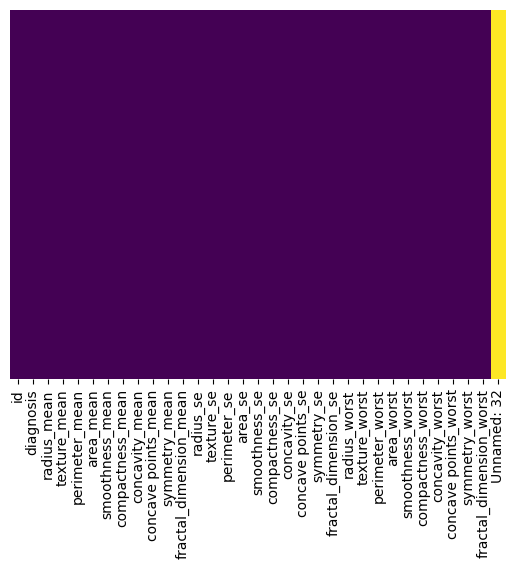

In [5]:
# visualize NAs in heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
# drop id and empty column
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [7]:
# turn target variable into 1s and 0s
data.diagnosis =[1 if value == "M" else 0 for value in data.diagnosis]

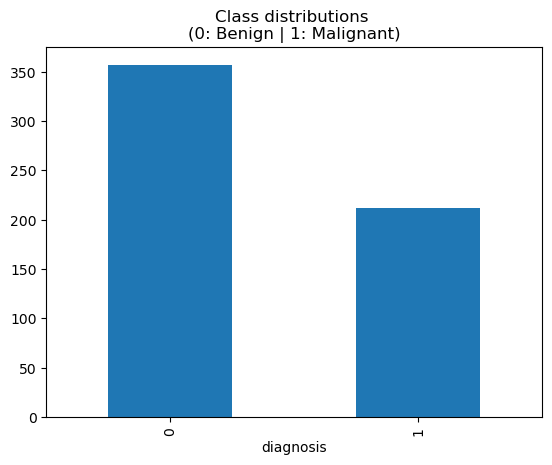

In [8]:
# turn the target variable into categorical data
data['diagnosis'] = data['diagnosis'].astype('category',copy=False)
plot = data['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
fig = plot.get_figure()

# Logistic Regression

## Esikäsittely

Kun aineistomme on puhdas ja tiedämme, että muuttujamme ovat luotettavia, voimme siirtyä mallin kouluttamiseen. Ensimmäinen tehtävä on erottaa kohdemuuttuja (tässä kutsuttu "y":ksi) ja selittävät muuttujat (tässä kutsuttu "X":ksi). Huomaa, että käytämme isoa X-kirjainta noudattaaksemme matemaattista konventiota. Matematiikassa iso kirjain edustaa monitahoista muuttujaa (matriisia).

In [9]:
# Prepare the model
y = data["diagnosis"] # our target variable
X = data.drop(["diagnosis"], axis=1) # our predictors

# Normalisoi data

Houkutuksesta huolimatta älä käytä dataa suoraan koulutus- ja testijoukkoihin jakamiseen., sillä data ei ole vielä normalisoitu. Tämä voi olla ongelma, koska muuttujien yksiköt eivät välttämättä ole samoissa mittayksiköissä. Lisäksi voi olla poikkeavia arvoja, jotka voivat heikentää mallin suorituskykyä.

Näissä tapauksissa normalisoimme datan ennen sen syöttämistä malliin. Tämä parantaa koneoppimisalgoritmin suorituskykyä.

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

Seuraavaksi jaamme aineiston koulutus- ja testijoukkoihin. Molemmilla on samat muuttujat (sarakkeet), mutta eri havainnot (rivit). Tätä varten käytämme kätevää Scikit-Learn-kirjaston funktiota nimeltä *train_test_split*. Tämä funktio ottaa selittävät muuttujat ja kohdemuuttujan ja jakaa ne satunnaisesti koulutus- ja testijoukkoihin. Funktio palauttaa neljä arvoa:

- Koulutusjoukon selittävät muuttujat, jotka tallennamme Python-muuttujaan nimeltä *X_train*.
- Koulutusjoukon kohdemuuttujat, jotka tallennamme Python-muuttujaan nimeltä *y_train*.
- Testijoukon selittävät muuttujat, jotka tallennamme Python-muuttujaan nimeltä *X_test*.
- Testijoukon kohdemuuttujat, jotka tallennamme Python-muuttujaan nimeltä *y_test*.

Jokainen havainto (rivi) *X*:ssä vastaa kohdearvoa *y*:ssä.

Lisäksi *train_test_split*-funktio ottaa käyttöön parametrin *test_size*, joka määrittää testijoukon koon, ja parametrin *random_state*, joka on mielivaltainen kokonaisluku, jonka avulla voimme toistaa jaon myöhemmin samalla tavalla. Usein valitsemme arvoksi 42, koska se on vastaus kaikkeen.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

# Arvioi malli

Tässä notebookissa olemme kouluttaneet logistisen regressiomallin ennustamaan kohdemuuttujaa käyttämällä aineiston syötemuuttujia. Kuten tässä näemme, koulutettuamme mallin koulutusdatalla ja arvioituamme sen suorituskyvyn testidatalla, saavutimme lopulliseksi tarkkuudeksi 0,98. Tämä on vahva suoritus ja osoittaa, että malli pystyy tekemään tarkkoja ennusteita uudesta, aiemmin näkemättömästä datasta.

On kuitenkin tärkeää huomata, että tarkkuus on vain yksi mittari mallin suorituskyvystä, eikä se välttämättä ole kaikissa tapauksissa paras mittari. Riippuen ongelmasta ja sovelluksen erityisvaatimuksista, muut mittarit, kuten precision, recall tai F1-score, voivat olla merkityksellisempiä. Toisessa solussa käytämme Scikit-learnin *classification_report*-funktiota näiden mittarien laskemiseen.

In [13]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Johtopäätökset

Olemme nyt saaneet analyysimme valmiiksi. Käytimme avoimen Breast Cancer -aineiston dataa rakentaaksemme mallin, joka ennustaa, onko solu pahanlaatuinen tiettyjen tumamittausten perusteella. Tämä malli, kun se on koulutettu, voi olla erittäin hyödyllinen solujen analysointiin sairaalassa.

Koska malli voidaan helposti kutsua Python-funktiona ennustuksia varten, se voidaan myös helposti liittää palvelinteknologiaan, kuten Flaskiin, ja tarjota käyttöliittymän kautta, jota lääkärit voivat käyttää. Esimerkiksi voisimme rakentaa käyttöliittymän, jossa lääkäri syöttää suorittamiaan mittauksia, ja malli antaisi vastauksena tiedon siitä, onko solu pahanlaatuinen vai ei. Tai realistisempi käyttötapa voisi olla yhdistää taustajärjestelmä laitteeseen, joka ottaa kudosnäytteen, mittaa solut ja tekee diagnoosin.

Pythonia käyttämällä tällaisen sovelluksen API olisi erittäin yksinkertainen, ja kaikki, mitä teimme ihmishenkien pelastamiseksi, oli kouluttaa logistisen regressiomalli sairaalan datan perusteella.